## Import Necessary Libraries

In [16]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the Data from the CSV File

In [17]:
# Load the CSV file into a Pandas DataFrame
file_path = '/content/cohort output.csv'
df = pd.read_csv(file_path)

# Inspect the first few rows of the DataFrame
df.head()

,first_purchase_month,Month_0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2010-12-01,1708,689,579,753,611,801,736,691,661,798,762,1135,395
1,2011-01-01,547,149,182,151,233,196,178,172,189,235,282,89,0
2,2011-02-01,474,136,113,162,141,134,124,164,136,187,40,0,0
3,2011-03-01,548,123,178,150,142,123,159,161,222,48,0,0,0
4,2011-04-01,386,109,93,78,83,89,94,120,32,0,0,0,0


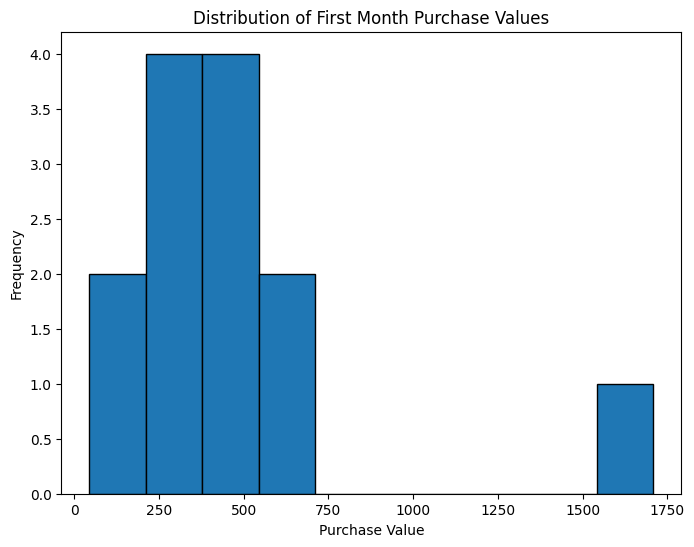

In [18]:
# @title Distribution of First Month Purchase Values

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['Month_0'], bins=10, edgecolor='black')
plt.title('Distribution of First Month Purchase Values')
plt.xlabel('Purchase Value')
_ = plt.ylabel('Frequency')

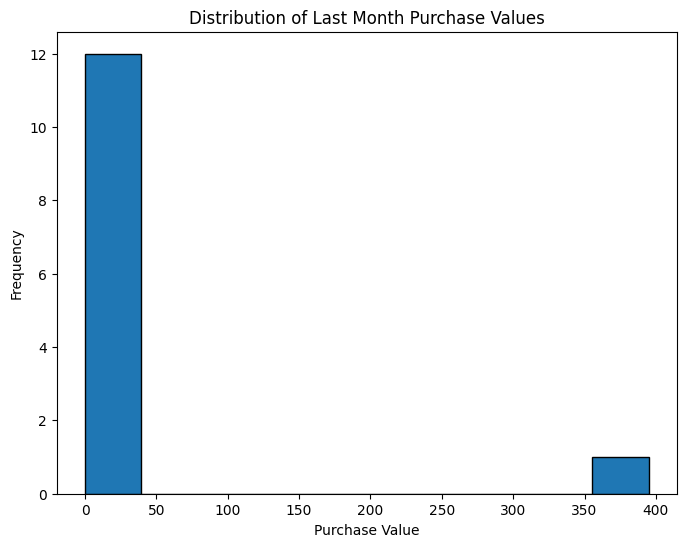

In [19]:
# @title Distribution of Last Month Purchase Values

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['Month_12'], bins=10, edgecolor='black')
plt.title('Distribution of Last Month Purchase Values')
plt.xlabel('Purchase Value')
_ = plt.ylabel('Frequency')

In [20]:
# Ensure "first_purchase_month" is the index
df.set_index("first_purchase_month", inplace=True)

# Check the structure of the DataFrame
print(df.info())


# Convert numeric columns to integers (if needed)
df = df.astype(int, errors='ignore')

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2010-12-01 to 2011-12-01
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Month_0   13 non-null     int64
 1   Month_1   13 non-null     int64
 2   Month_2   13 non-null     int64
 3   Month_3   13 non-null     int64
 4   Month_4   13 non-null     int64
 5   Month_5   13 non-null     int64
 6   Month_6   13 non-null     int64
 7   Month_7   13 non-null     int64
 8   Month_8   13 non-null     int64
 9   Month_9   13 non-null     int64
 10  Month_10  13 non-null     int64
 11  Month_11  13 non-null     int64
 12  Month_12  13 non-null     int64
dtypes: int64(13)
memory usage: 1.4+ KB
None


## Heatmap Visualization

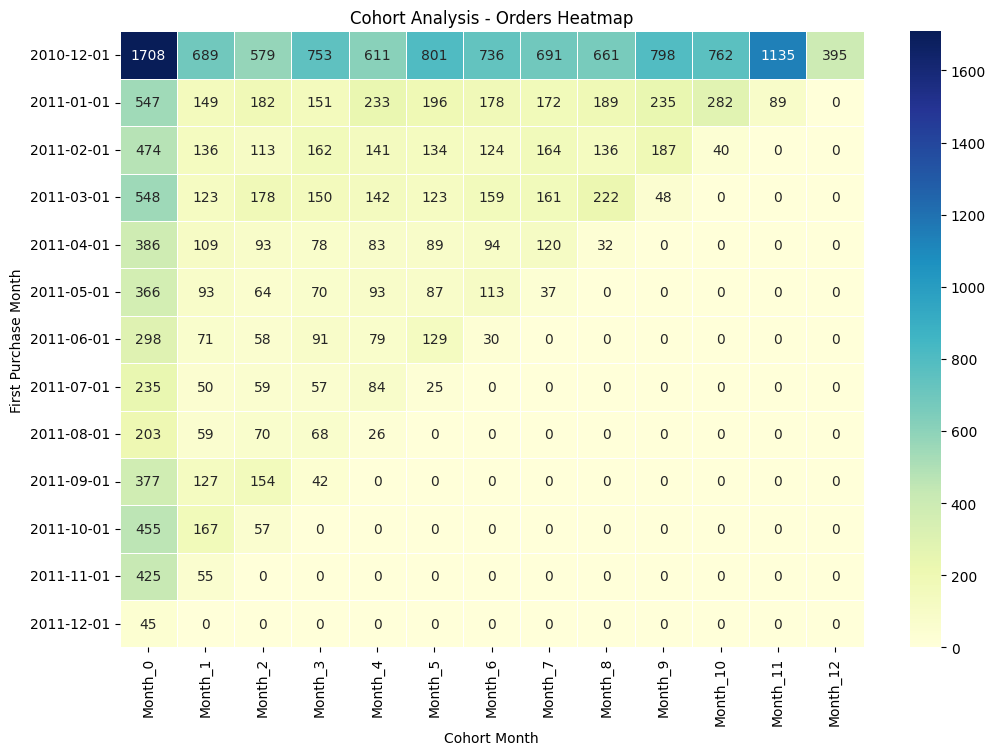

In [21]:
# Plot a heatmap for the cohort data
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Cohort Analysis - Orders Heatmap")
plt.ylabel("First Purchase Month")
plt.xlabel("Cohort Month")
plt.show()

## Line Chart Visualization

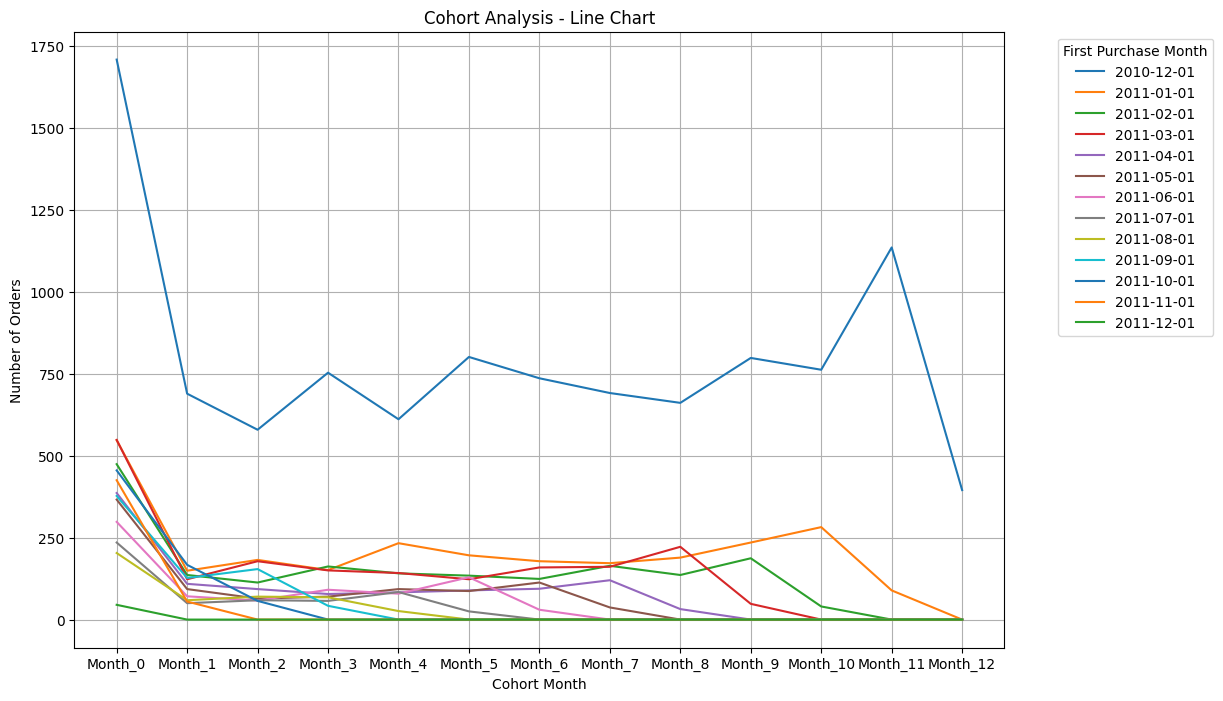

In [22]:
# Plot a line chart for each cohort
plt.figure(figsize=(12, 8))
for index, row in df.iterrows():
    plt.plot(row.index, row.values, label=index)
plt.title("Cohort Analysis - Line Chart")
plt.ylabel("Number of Orders")
plt.xlabel("Cohort Month")
plt.legend(title="First Purchase Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

## Bar Chart for Month_0

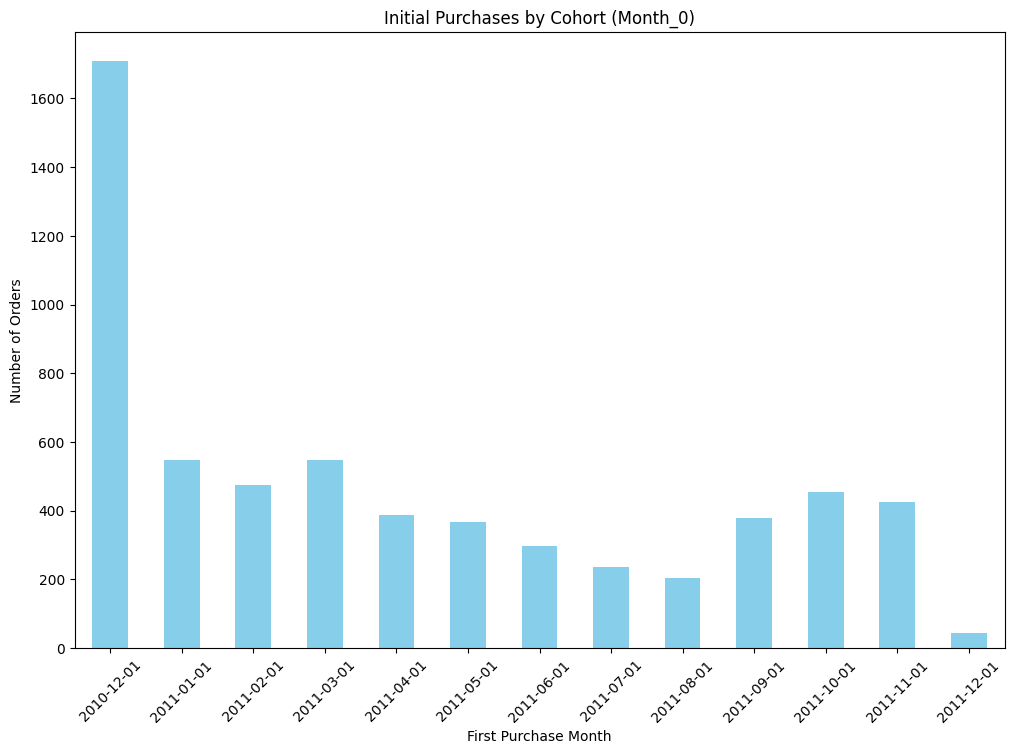

In [23]:
# Plot a bar chart to show initial purchases (Month_0)
plt.figure(figsize=(12, 8))
df["Month_0"].plot(kind="bar", color="skyblue")
plt.title("Initial Purchases by Cohort (Month_0)")
plt.ylabel("Number of Orders")
plt.xlabel("First Purchase Month")
plt.xticks(rotation=45)
plt.show()

## Percentage Heatmap Visualization

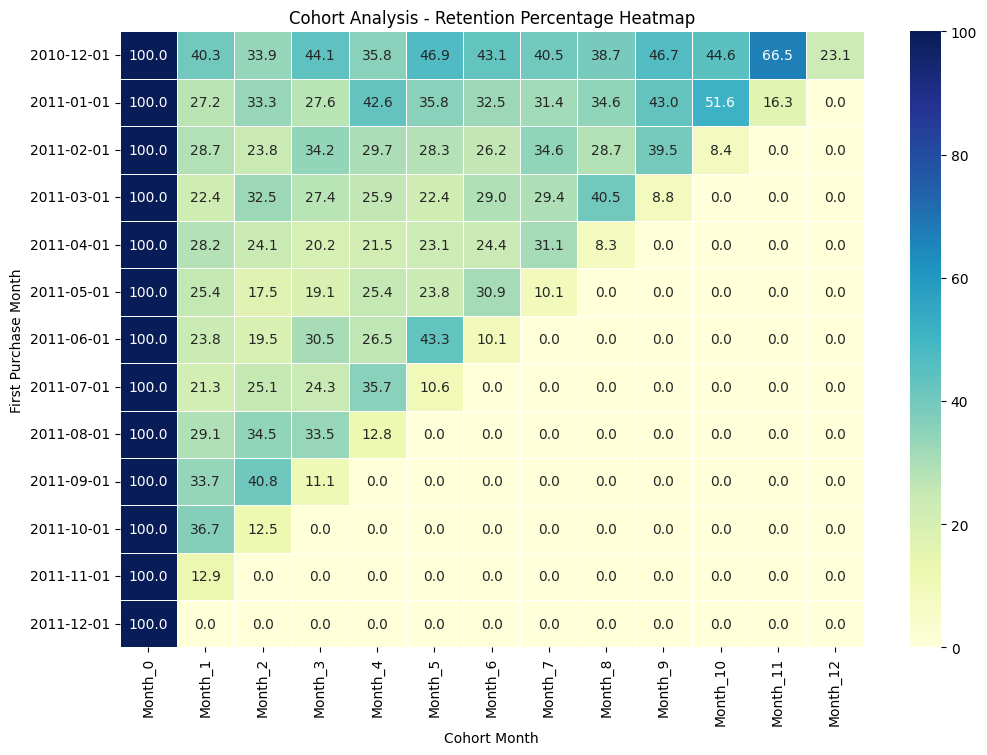

In [24]:
# Convert to percentages for the retention heatmap
df_percentage = df.div(df["Month_0"], axis=0).fillna(0) * 100

# Plot a percentage heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_percentage, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Cohort Analysis - Retention Percentage Heatmap")
plt.ylabel("First Purchase Month")
plt.xlabel("Cohort Month")
plt.show()

### Line Chart of Retention Trends Across Cohorts: Understand how retention varies for each cohort over time.

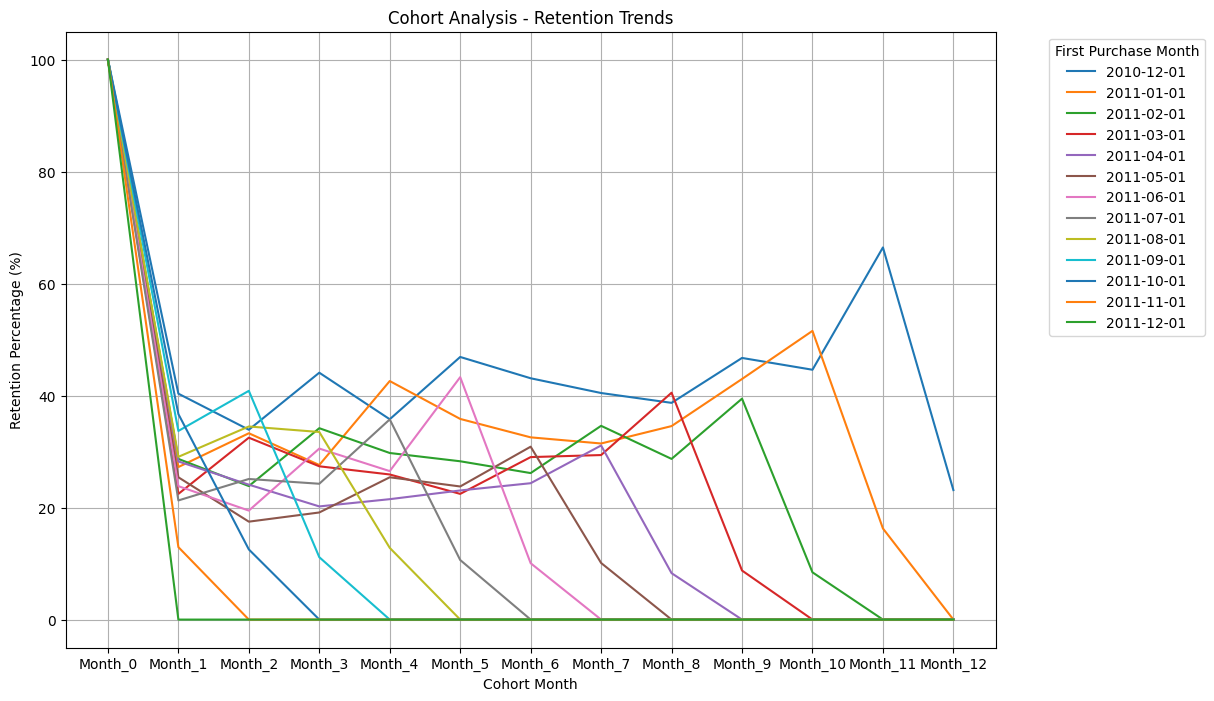

In [25]:
# Retention trends for each cohort
df_percentage = df.div(df["Month_0"], axis=0).fillna(0) * 100

# Line chart of retention trends
plt.figure(figsize=(12, 8))
for index, row in df_percentage.iterrows():
    plt.plot(row.index, row.values, label=index)

plt.title("Cohort Analysis - Retention Trends")
plt.ylabel("Retention Percentage (%)")
plt.xlabel("Cohort Month")
plt.legend(title="First Purchase Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

### Stacked Bar Chart for Monthly Orders: Analyze contributions of cohorts to total orders over time.

<Figure size 1200x800 with 0 Axes>

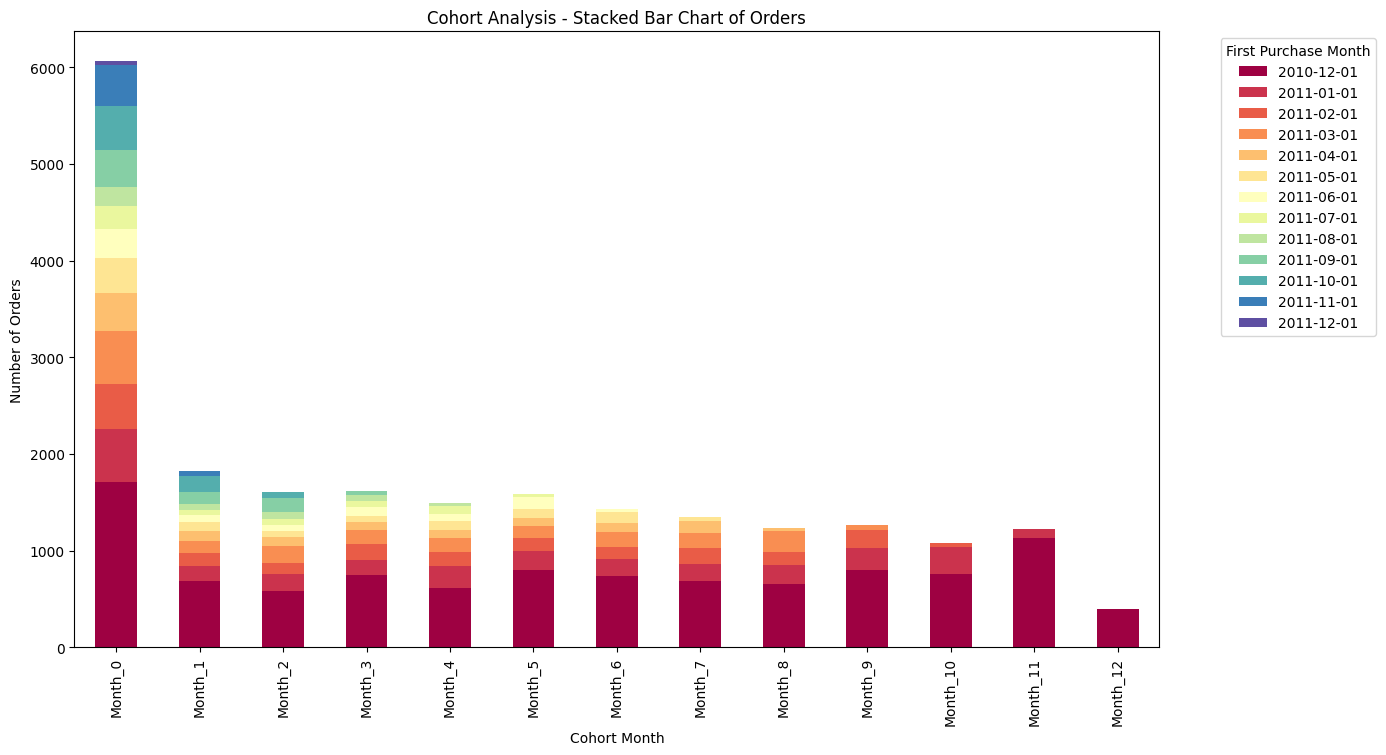

In [26]:
# Stacked bar chart for monthly orders
plt.figure(figsize=(12, 8))
df.T.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="Spectral")
plt.title("Cohort Analysis - Stacked Bar Chart of Orders")
plt.ylabel("Number of Orders")
plt.xlabel("Cohort Month")
plt.legend(title="First Purchase Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Waterfall Chart for Retention Drop-Off: Track cumulative retention drop-off across months.

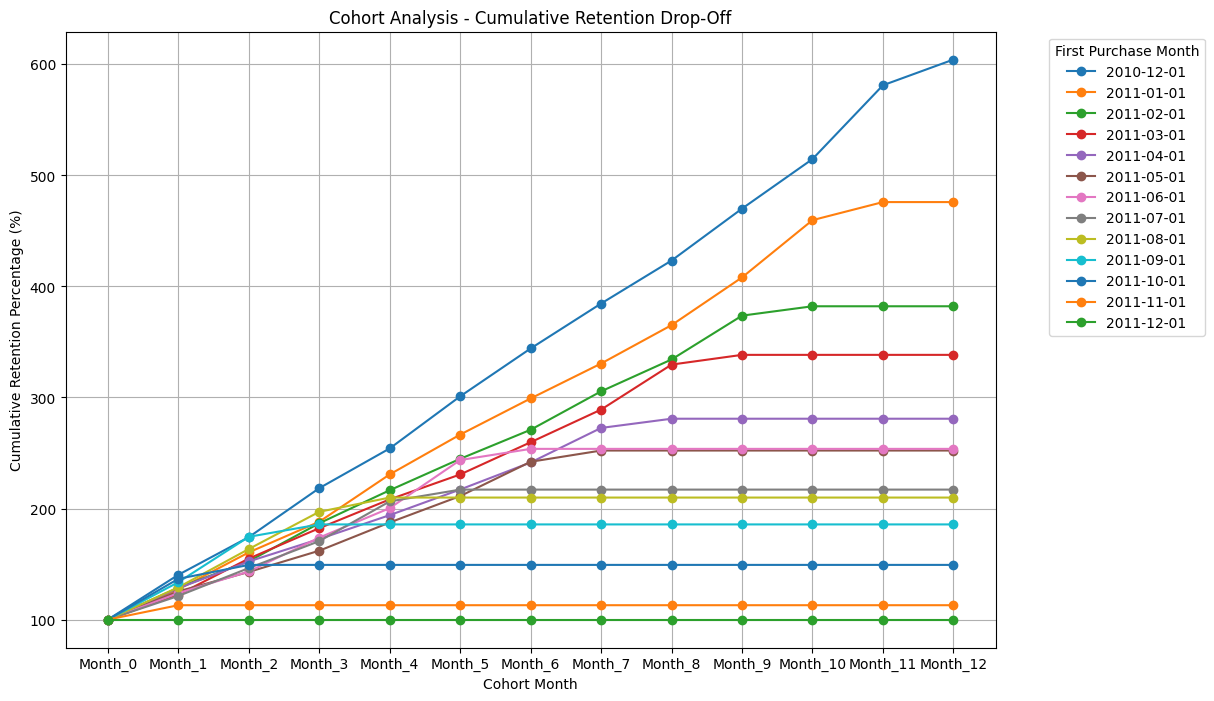

In [27]:
# Waterfall chart: cumulative drop-off in retention
df_percentage_cumulative = df_percentage.cumsum(axis=1)

plt.figure(figsize=(12, 8))
for index, row in df_percentage_cumulative.iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

plt.title("Cohort Analysis - Cumulative Retention Drop-Off")
plt.ylabel("Cumulative Retention Percentage (%)")
plt.xlabel("Cohort Month")
plt.legend(title="First Purchase Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

### Box Plot of Retention Rates by Cohort Month: Explore the variability in retention rates across cohorts.

<ipython-input-28-bd4f865a150b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cohort Month", y="Retention Percentage", data=df_melted, palette="Set3")


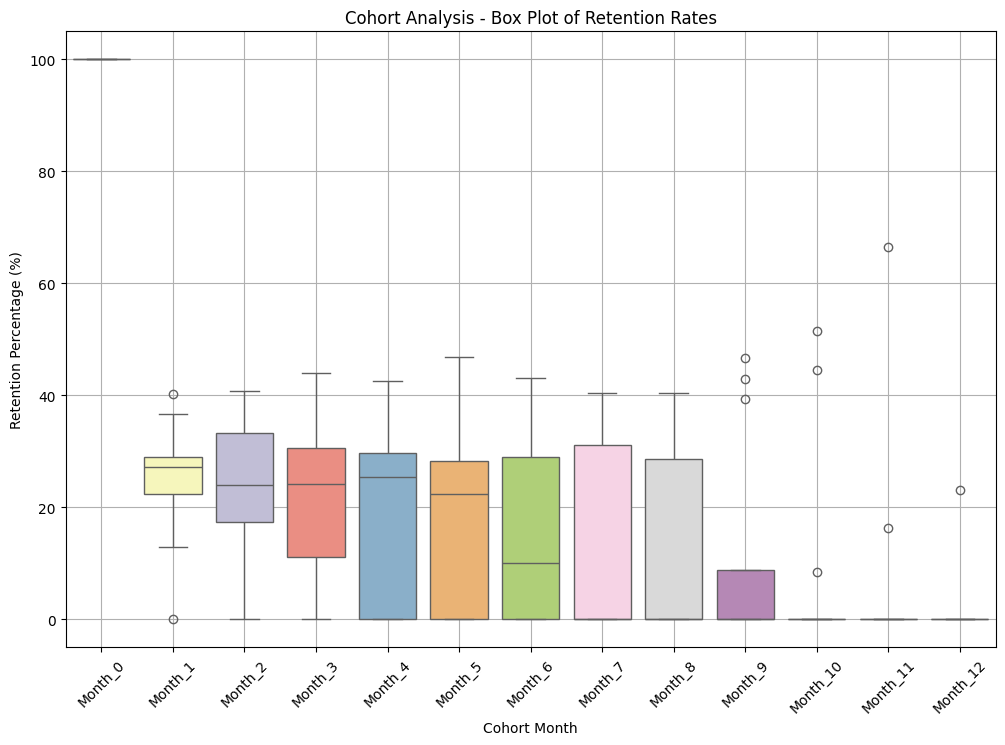

In [28]:
# Convert the percentage DataFrame for box plot
df_melted = df_percentage.reset_index().melt(id_vars="first_purchase_month", var_name="Cohort Month", value_name="Retention Percentage")

# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x="Cohort Month", y="Retention Percentage", data=df_melted, palette="Set3")
plt.title("Cohort Analysis - Box Plot of Retention Rates")
plt.ylabel("Retention Percentage (%)")
plt.xlabel("Cohort Month")
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Heatmap of Cumulative Retention: See how retention builds up cumulatively across months.

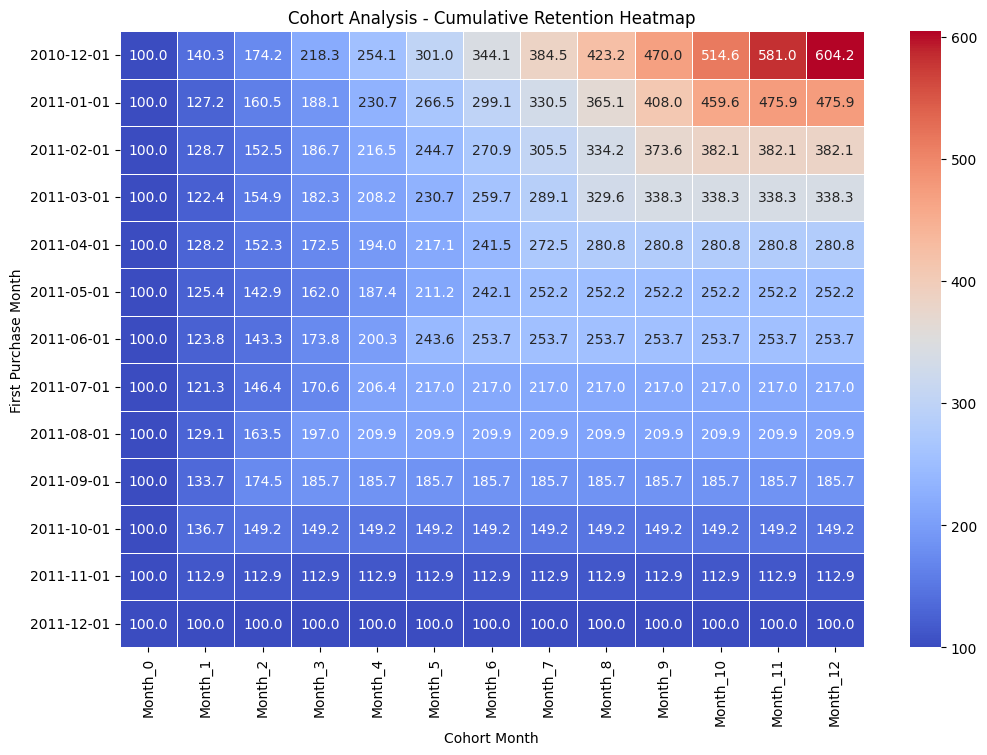

In [29]:
# Heatmap for cumulative retention
plt.figure(figsize=(12, 8))
sns.heatmap(df_percentage_cumulative, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Cohort Analysis - Cumulative Retention Heatmap")
plt.ylabel("First Purchase Month")
plt.xlabel("Cohort Month")
plt.show()